# Слои подвыборки

In [21]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
%matplotlib inline
_ = torch.manual_seed(1)

Слои подвыборки (pooling, subsampling) часто используются для уменьшения разрешения тензоров в сети.\
Основные виды подвыборки:
- выборка усреднением (Average Pooling);
- выборка выбором максимального значения (Max Pooling).
- Как ещё?

![Average_Pooling](media/avg_pool.png "Average Pooling")
![Max_Pooling](media/max_pool.png "Max Pooling")

(128, 128)


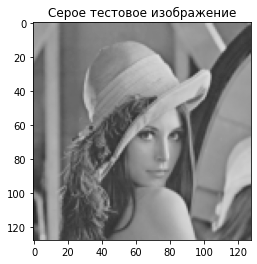

In [22]:
lena = plt.imread('media/Lenna.png')
# Делаем изображение серым
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [1/3, 1/3, 1/3])
gray = rgb2gray(lena)
gray = resize(gray, (128, 128))
print(gray.shape)
plt.title('Серое тестовое изображение')
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

x = torch.from_numpy(gray).unsqueeze(0).unsqueeze(0)

(1, 1, 5, 5)


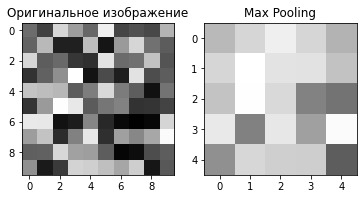

(1, 1, 5, 5)


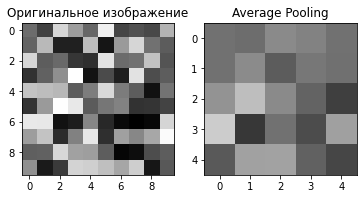

(1, 1, 9, 9)


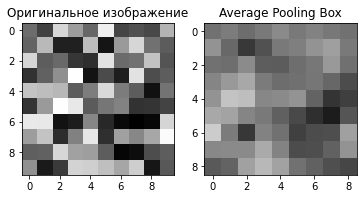

(1, 1, 64, 64)


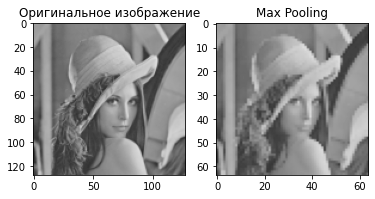

(1, 1, 64, 64)


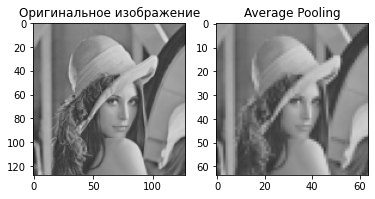

(1, 1, 127, 127)


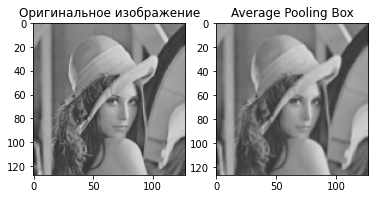

In [46]:
operations = {
    'Max Pooling': torch.nn.MaxPool2d(kernel_size=2, stride=2),
    'Average Pooling': torch.nn.AvgPool2d(kernel_size=2, stride=2),
    'Average Pooling Box': torch.nn.AvgPool2d(kernel_size=2, stride=1, padding=0)
}
size = 10
image_small = torch.rand(1, 1, size, size)
for img in (image_small, x):
    for name, op in operations.items():
        pooled = op(img)
        result = pooled.numpy()
        side_size = pooled.shape[-1]
        print(result.shape)
        plt.subplot(1, 2, 1) 
        plt.title('Оригинальное изображение')
        plt.imshow(img.reshape((img.shape[-2],img.shape[-1])), cmap='gray', vmin=0, vmax=1)
        plt.subplot(1, 2, 2) 
        plt.title(name)
        plt.imshow(result.reshape((side_size,side_size)), cmap='gray', vmin=0, vmax=1)
        plt.show()

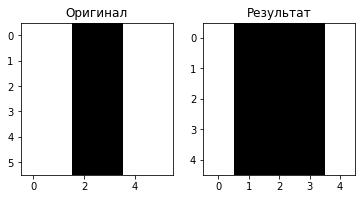

In [54]:
# Более наглядные примеры
img = np.array([[0,0,1,1,0,0],
                [0,0,1,1,0,0],
                [0,0,1,1,0,0],
                [0,0,1,1,0,0],
                [0,0,1,1,0,0],
                [0,0,1,1,0,0]], dtype=float)
op = torch.nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
x = torch.from_numpy(img).unsqueeze(0).unsqueeze(0)
dilated = op(x)

plt.subplot(1,2,1)
plt.title('Оригинал')
plt.imshow(img, cmap='Greys', vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.title('Результат')
plt.imshow(dilated.numpy().reshape((5,5)), cmap='Greys', vmin=0, vmax=1)
plt.show()